### Author Name : **Muhammad Taha**
### Email : contact.taha2005@gmail.com

#### Connect with me:
-  [**GitHub**](https://github.com/MuhammadTaha1038)
-  [**LinkedIn**](https://www.linkedin.com/in/muhammad-taha-b88807248/)


# Title : **Analysis of Crimes in Los Angeles**

![Los Angeles skyline](la_skyline.jpg)


# **Description**
Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!


### **The Data**

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

### **crimes.csv**

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

# **Importing the Libraries**

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("libraries imported successfully")

libraries imported successfully


# **Loading the Data**

In [166]:
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})

print("Data imported successfully")

Data imported successfully


# **Exploring the Data**

In [167]:
# displaying few rows of the dataset
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [168]:
# number of rows and columns of the dataset
rows = crimes.shape[0]
col = crimes.shape[1]
print(f" Total Rows are : {rows}")
print(f" Total Columns are : {col}")

 Total Rows are : 185715
 Total Columns are : 12


In [169]:
# getting some information of columns of the dataset
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [170]:
# calculating the missing values
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [171]:
# handling the missing values
crimes.drop(columns='Weapon Desc', inplace=True)
crimes.dropna(inplace=True)

print("Successfully handled")

Successfully handled


In [172]:
# checking duplicate rows
a=crimes.duplicated().sum()
print(a)

0


In [173]:
crimes['Vict Sex'].value_counts()

Vict Sex
M    93008
F    89853
X     2812
H       30
Name: count, dtype: int64

# **Visualizations and Insights**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9252\1499038355.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=k, x='Vict Sex', palette='viridis')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9252\1499038355.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female', 'Male'])


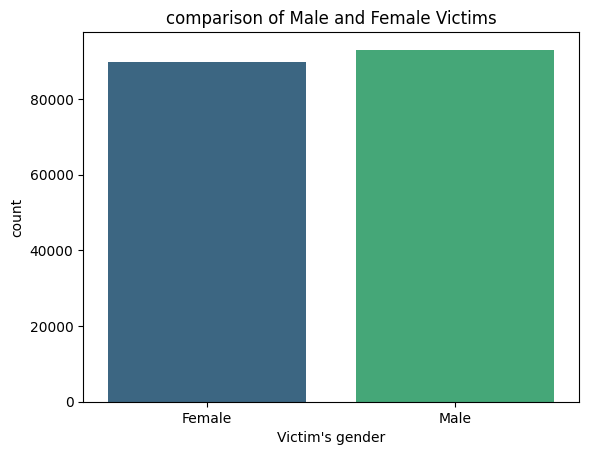

In [174]:
# visualizeing the comparison of Male and Female victims

k = crimes[crimes['Vict Sex'].isin(["F", "M"])]      

ax=sns.countplot(data=k, x='Vict Sex', palette='viridis')
ax.set_title("comparison of Male and Female Victims")
ax.set_xticklabels(['Female', 'Male'])
ax.set_xlabel("Victim's gender")
plt.show()

- ### **There is no differnce in camparison of Male and Female victims**

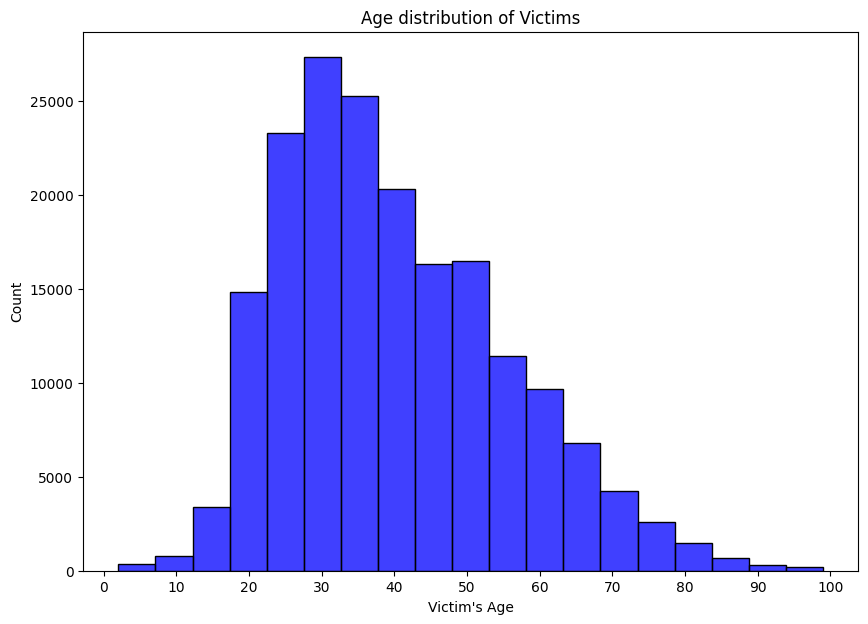

In [175]:
# visualizing the distribution of Age of victims

plt.figure(figsize=(10,7))
ax=sns.histplot(data=crimes, x='Vict Age', binwidth = 5, color='b')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.title('Age distribution of Victims')
plt.xlabel("Victim's Age")
plt.show()

- ### **Mostly Victims are of twenty to fourty years**

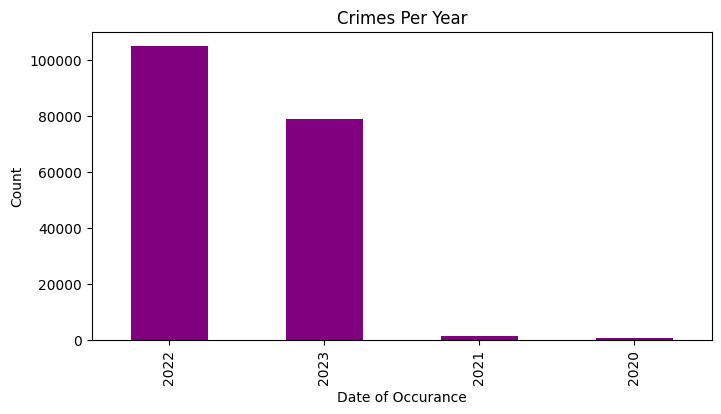

In [176]:
# vizualizing the Crimes per year

crimes["DATE OCC"].dt.year.value_counts().plot(kind="bar", figsize=(8,4), title="Crimes Per Year", color='purple')
plt.xlabel("Date of Occurance")
plt.ylabel("Count")
plt.show()

- ### **Majority of the data is from 2022 and 2023**

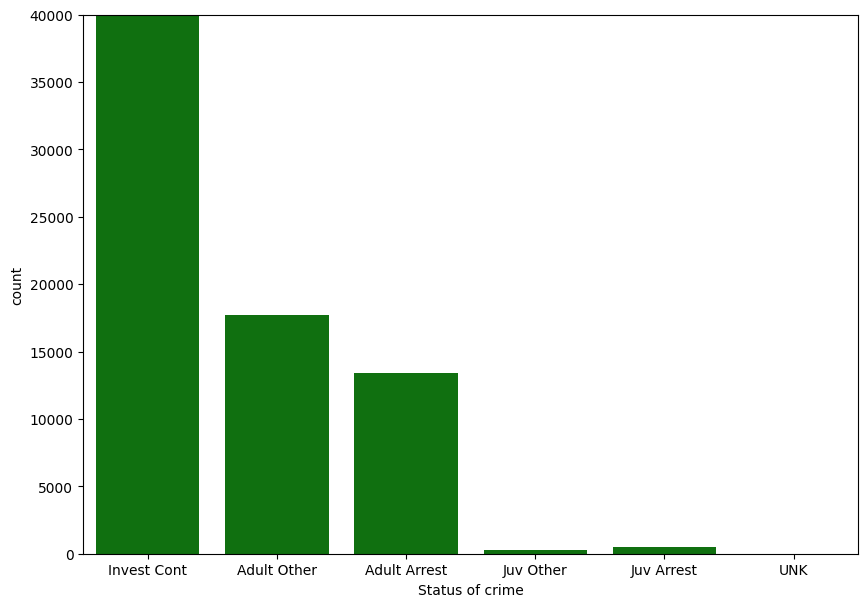

In [177]:
# displaying the current status of crime

plt.figure(figsize=(10, 7))
sns.countplot(data=crimes, x='Status Desc', color='green')
plt.ylim(0, 40000)
plt.xlabel('Status of crime')
plt.show()

- ### **There is an huge number of crimes whose investigation is still going on**

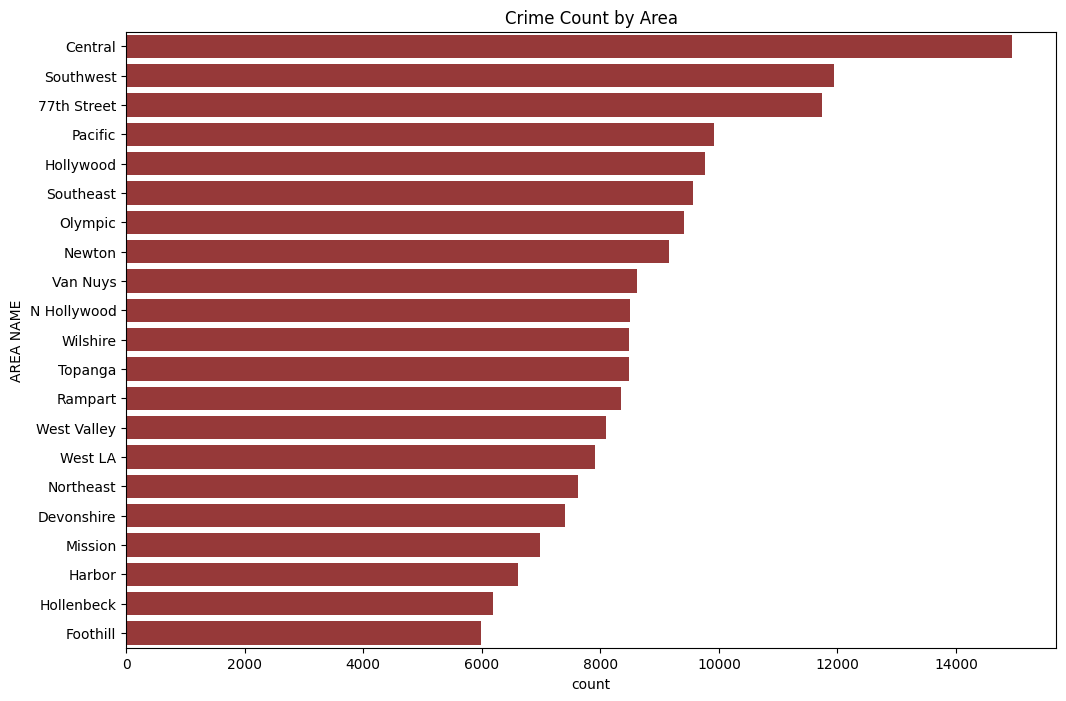

In [178]:
# visualizing the number of crimes in each Area

plt.figure(figsize=(12,8))
sns.countplot(y="AREA NAME", data=crimes, order=crimes["AREA NAME"].value_counts().index, color='brown')
plt.title("Crime Count by Area")
plt.show()


- ### **Aproximately all the areas are facing same number of crimes but Central area is more dangerous**

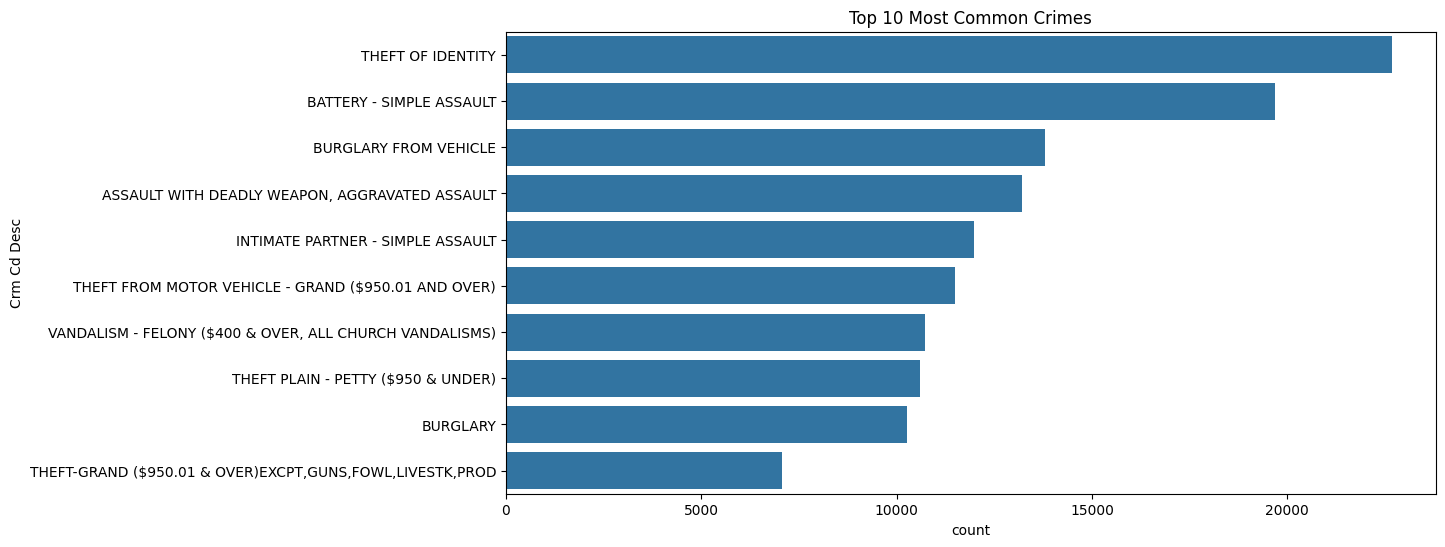

In [179]:
# Counting the top 10 most common crimes

plt.figure(figsize=(12,6))
sns.countplot(y="Crm Cd Desc", data=crimes, order=crimes["Crm Cd Desc"].value_counts().index[:10])
plt.title("Top 10 Most Common Crimes")
plt.show()


- ### **There is a very big number of thiefs in Los Angeles**

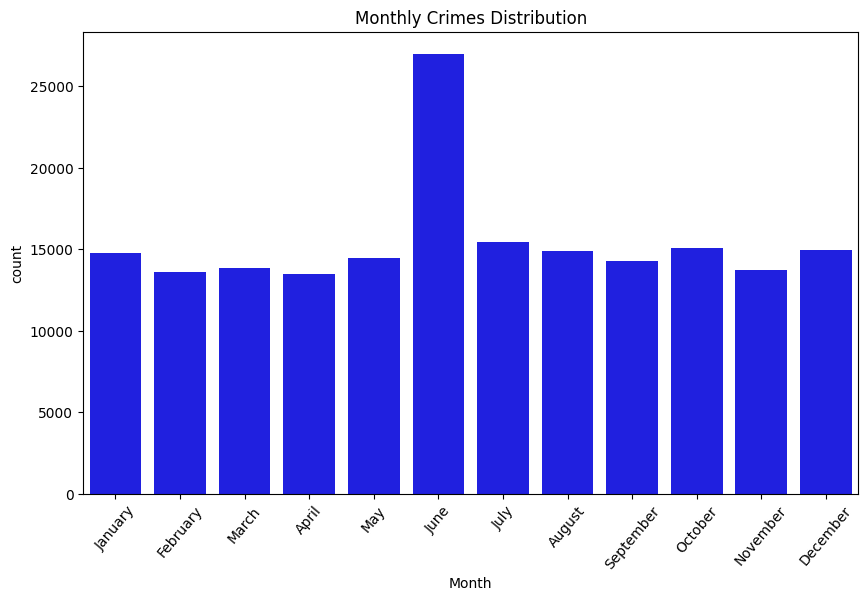

In [180]:
# Extracting the month of crimes happening
crimes['Month'] = crimes['DATE OCC'].dt.month

# ploting the graph
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=crimes, x='Month', color='blue' )
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['January','February','March', "April", 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=50)
plt.title('Monthly Crimes Distribution')
plt.show()

- ### **The month is not affecting the crimes except the June month**

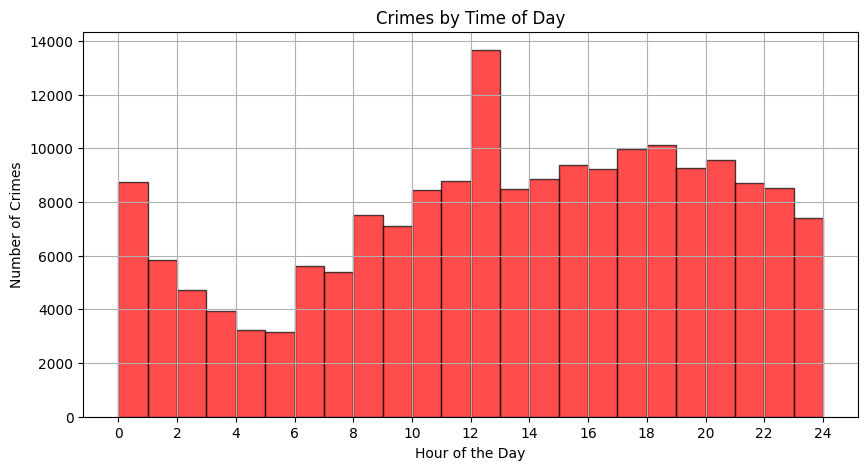

In [181]:
# Convert 'TIME OCC' to proper format
crimes['HOUR OCC'] = (pd.to_numeric(crimes['TIME OCC']))//100 # Extract hour part

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(crimes['HOUR OCC'], bins=24, range=(0, 24), color='red', alpha=0.7, edgecolor='black')
plt.title("Crimes by Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.xticks(range(0, 25, 2))
plt.grid(True)
plt.show()


- ### **Criminals are more active from 10am to 09pm** 

# **Conclusion**
The analysis of the Los Angeles crime dataset reveals significant trends in crime distribution, time patterns, and victim demographics. Crimes peak between 10 AM and midnight, with Central, Southwest, and 77th Street being major hotspots. Young adults (20-40 years) are the most common victims, and males are more frequently targeted in violent crimes. Seasonal variations also affect crime rates. Geospatial heatmaps highlight high-risk areas, aiding law enforcement in strategic planning. This analysis provides valuable insights for crime prevention and policy-making. 🚔📊